In [1]:
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()


# Deep learning packages
from keras.models import Sequential
from keras.layers import LSTM, Dense

#enable IPython to display matplolib graphs
%matplotlib inline


2022-03-20 11:33:23.905458: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-03-20 11:33:23.905475: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.


In [2]:
from ML_classes.Lin_reg import Lin_reg_baseline

In [3]:
df = pd.read_csv('./data/ouput.csv')
df['tstp'] = [datetime.strptime(x, '%Y-%m-%d %H:%M:%S') for x in df['tstp']]
#df["tstp"] = pd.to_datetime(df["tstp"])
df["energy(kWh/hh)"] = pd.to_numeric(df["energy(kWh/hh)"], downcast="float", errors="coerce")

#max_value_energy = df["energy(kWh/hh)"].max()
#df['energy(kWh/hh)'] = df['energy(kWh/hh)'].apply(lambda x: x / max_value_energy)
# Sorting the values
df.sort_values('tstp', inplace=True)

In [4]:
lclid_list = df['LCLid'].unique()
def find_household(identification):
    affluenthh_filt = df["LCLid"] == identification
    affluent_hh_data = df[affluenthh_filt]
    return affluent_hh_data

hh = find_household("MAC000150")
hh.pop("LCLid")
hh = hh.set_index("tstp")
hh = hh.resample("H").sum()
hh = hh.reset_index()

In [5]:
#hh.plot( y ="energy(kWh/hh)", ylabel = "kWh")

In [6]:
#hh.tail(1000)

In [7]:
# Initiating the class
deep_learner = Lin_reg_baseline(
data = hh,
Y_var = 'energy(kWh/hh)',
train_test_split = 0.15,
mode = "auto",
lag = 24
)

[[0.428      0.76499999 0.21799999 ... 0.264      0.141      0.16      ]
 [0.76499999 0.21799999 0.171      ... 0.141      0.16       0.29300001]
 [0.21799999 0.171      0.382      ... 0.16       0.29300001 0.25599998]
 ...
 [0.57099998 0.28600001 0.27700001 ... 0.903      3.56200004 1.15400004]
 [0.28600001 0.27700001 0.278      ... 3.56200004 1.15400004 1.07999992]
 [0.27700001 0.278      0.19400001 ... 1.15400004 1.07999992 0.634     ]]
one vector:  [0.428      0.76499999 0.21799999 0.171      0.382      0.30599999
 0.36300001 0.433      0.40899998 0.447      1.898      2.01499987
 0.94600004 0.47299999 0.36199999 0.30700001 0.30000001 0.23099999
 0.15099999 0.14399999 0.26199999 0.264      0.141      0.16      ]
(16863, 24)
16863


In [8]:
deep_learner.model_init()

In [9]:
deep_learner.predictions()

array([0.52423891, 0.32213927, 0.25815834, ..., 0.7213478 , 0.56534308,
       0.32384424])

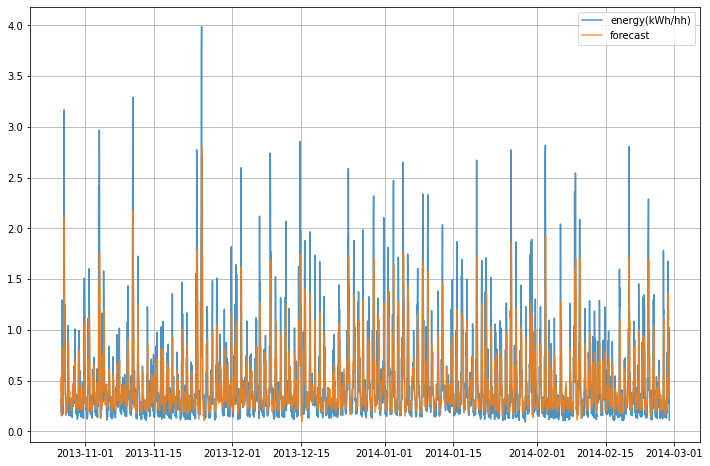

In [10]:
yhat = deep_learner.predictions()
# Constructing the forecast dataframe
fc = hh.tail(len(yhat)).copy()
fc.reset_index(inplace=True)
fc['forecast'] = yhat
# Ploting the forecasts
plt.figure(figsize=(12, 8))
for dtype in ['energy(kWh/hh)', 'forecast']:
  plt.plot(
    'tstp',
    dtype,
    data=fc,
    label=dtype,
    alpha=0.8
  )
plt.legend()
plt.grid()

In [11]:

#Forecasting n steps ahead
n_ahead = 168
yhat = deep_learner.predict_n_ahead(n_ahead)
yhat = [y for y in yhat]

#Constructing the forecast dataframe
fc = hh.tail(400).copy() 
fc['type'] = 'original'

last_date = max(fc['tstp'])
hat_frame = pd.DataFrame({
    'tstp': [last_date + timedelta(hours=x + 1) for x in range(n_ahead)], 
    'energy(kWh/hh)': yhat,
    'type': 'forecast'
})

fc = fc.append(hat_frame)
fc.reset_index(inplace=True, drop=True)
#Ploting the forecasts 
plt.figure(figsize=(12, 8))
for col_type in ['original', 'forecast']:
    plt.plot(
        'tstp', 
        'energy(kWh/hh)', 
        data=fc[fc['type']==col_type],
        label=col_type
        )

plt.legend()
plt.grid()   

ValueError: All arrays must be of the same length

In [ ]:
deep_learner.evaluateMSE()

In [ ]:
deep_learner.evaluateRMSE()

In [ ]:
deep_learner.evaluateMAE()

In [ ]:
deep_learner.evaluateMAPE()

In [ ]:
deep_learner.predictions()

In [ ]:
c = hh.tail(len(yhat)).copy()
c